In [10]:
using FFTW
using LinearAlgebra
using ProgressMeter
using BenchmarkTools
using Plots
pyplot()

Plots.PyPlotBackend()

In [16]:
include("../src/mesh.jl")
include("../src/times.jl")
abstract type AbstractModel end
include("../src/models/cheng.jl")
include("../src/models/matsuno.jl")
include("../src/solvers.jl")

step! (generic function with 1 method)

In [17]:
function solve!(model::AbstractModel, h, u, times::Times, solver::TimeSolver)
                
    prog = Progress(times.Nt,1) 
    
    model.data = []
  
    push!(model.data,(h,u))
    for l in range(1,times.Nt-1)
        
        dt = times.t[l+1]-times.t[l]
        
        step!( solver, model, h, u, dt)
    
        push!(model.data,(h,u))   
        next!(prog)
    end
            
end

solve! (generic function with 1 method)

In [32]:
include("../src/fig.jl")

plot_model! (generic function with 1 method)

(epsilon, N, L, T, dt) = (0.5, 4096, 10, 5, 0.001)


Progress:  96%|███████████████████████████████████████  |  ETA: 0:00:00

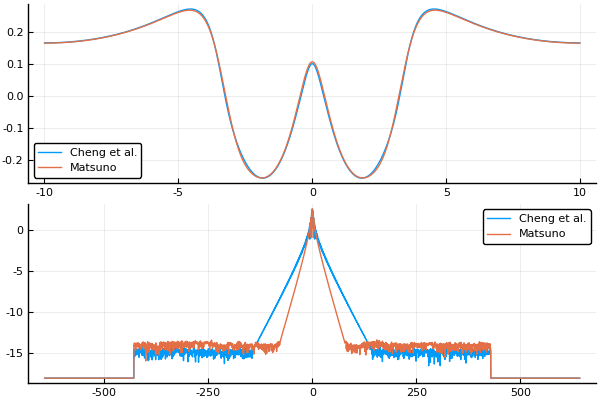

In [34]:
epsilon = 1/2
N       = 2^12
L       = 10
T       = 5
dt      = 0.001

@show epsilon,N,L,T,dt

mesh   = Mesh(-L, L, N)
times  = Times(dt, T)
solver = RK4( N )

h  = zeros(Complex{Float64}, N)
u  = zeros(Complex{Float64}, N)

models = [Cheng(mesh, epsilon), Matsuno(mesh, epsilon)]
p = plot(layout=(2,1))


        
for model in models
    h .= model.Pi .* fft(exp.(-mesh.x.^2))
    u .= 0.0im


solve!(model, h, u, times, solver )

plot_model!(p, times, model, mesh )

model = 

h .= model.Pi .* fft(exp.(-mesh.x.^2))
u .= 0.0im
    
solve!(model, h, u, times, solver )

plot_model!(p, times, model, mesh )



In [37]:
function g( x ) 
    
    try
       println(typeof(x))
    catch
    end
    
end

g (generic function with 1 method)

In [38]:
g(y)

UndefVarError: UndefVarError: y not defined